In [1]:
# ANAYLSIS OF GREEN HOUSE GASES FOCUSED ON G-20 MEMBERS IN EAST ASIA (China, Japan, India, Indonesia, South Korea)

# MAIN QUESTIONS OF INTEREST:
# WHO HAS THE HIGHEST AVERAGE CO2 EMISSIONS OF OVER THE LAST 2 DECADES?
# WHAT IS THE GLOBAL EMISSIONS TREND
# ANALYSIS FROM THE SIDE OF JAPAN, HOW DO THEY COMPARE?
# DOES POPULATION GROWTH HAVE A MEANINGFUL CORRELATION?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Read the CSV files
df = pd.read_csv('C:/Users/ich3l/Desktop/PythonNEWProject/climate_change_data/climate_change_data.csv')
df_pop = pd.read_csv("C:/Users/ich3l/Downloads/country_of_interest_pop_data.csv")
df.drop(['Temperature','Sea Level Rise','Precipitation','Humidity','Wind Speed'], axis=1, inplace=True)
print(df.head())
df_pop.drop(['Series Name', 'Series Code', 'Country Code'], axis=1, inplace=True)
print(df_pop.head())
print(df.columns)

                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   CO2 Emissions  
0     403.118903  
1     396.663499  
2     451.553155  
3     422.404983  
4     410.472999  
  Country Name        2000        2001        2002        2003        2004  \
0        Japan   126843000   127149000   127445000   127718000   127761000   
1    Indonesia   214072421   217112437   220115092   223080121   225938595   
2        India  1059633675  1078970907  1098313039  1117415123  1136264583   
3        China  1262645000  1271850000  1280400000  1288400000  1296075000   
4        Korea    23367059    23512522    23638411    23781707    23948930   

  

In [4]:
#Establish contries of interest
country_of_interest = ["Korea", "Japan", "China", "India", "Indonesia"]

In [5]:
#print(df_pop.iloc[1,0])

japan_pop = []
indonesia_pop = []
india_pop = []
korea_pop = []
china_pop = []
year_list_pop = df_pop.columns.to_list()
year_list_pop.pop(0)
# Iterate through the DataFrame using iloc
for i in range(len(df_pop)):
    for j in range(len(df_pop.columns)):
        element = df_pop.iloc[i, j]
        if i == 0 and j != 0:
            japan_pop.append(element/1000000)
        elif i == 1 and j != 0:
            indonesia_pop.append(element/1000000)
        elif i == 2 and j != 0:
            india_pop.append(element/1000000)
        elif i == 3 and j != 0:
            china_pop.append(element/1000000)
        elif i == 4 and j != 0:
            korea_pop.append(element/1000000)
        #print(f"Element at row {i} and column {j}: {element}")
#print(japan_pop)
#print(china_pop)
#print(year_list_pop)

In [6]:
# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Filter for countries referenced more than once
duplicated_countries = country_counts[country_counts > 1]

# Print the duplicated country references
print(duplicated_countries)

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64


In [7]:
# Convert country_counts series to a dictionary
country_counts_dict = country_counts.to_dict()

for key in country_counts_dict:
    print(key)

Congo
Korea
Tanzania
Armenia
French Guiana
Georgia
Liechtenstein
Cook Islands
Australia
Slovakia (Slovak Republic)
Reunion
Angola
Swaziland
Antigua and Barbuda
Vietnam
Cape Verde
Latvia
Botswana
Sierra Leone
Belize
Serbia
Uganda
Kiribati
Sao Tome and Principe
Central African Republic
Dominica
Somalia
Taiwan
Namibia
New Zealand
Sudan
Rwanda
Honduras
Kyrgyz Republic
Nepal
Burkina Faso
Turkmenistan
Heard Island and McDonald Islands
Singapore
Gambia
Ghana
Palestinian Territory
Tonga
Kenya
Iraq
Ecuador
Mozambique
Fiji
Andorra
Lesotho
Solomon Islands
Trinidad and Tobago
Malta
Paraguay
Puerto Rico
Netherlands Antilles
Slovenia
Cambodia
British Virgin Islands
Sri Lanka
Philippines
Bolivia
Liberia
Panama
Bosnia and Herzegovina
Oman
Switzerland
Romania
Maldives
Qatar
Estonia
Iran
Bahamas
Bhutan
Guinea
American Samoa
Vanuatu
Bulgaria
Northern Mariana Islands
Chad
Montserrat
Saudi Arabia
Jersey
Belgium
New Caledonia
Bahrain
Iceland
Algeria
United Arab Emirates
Brazil
Venezuela
Poland
Thailand
Hait

In [8]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Group records by 'Country' and 'Year'
grouped_df = df.groupby(['Country', 'Year'])

# Create separate DataFrames for each group
separate_dfs = [group_df for _, group_df in grouped_df]

In [9]:
# Save them to categorized dataframes
for (country, year), group_df in grouped_df:
    df_title = f"df_{country}_{year}"
    globals()[df_title] = group_df.copy()

In [10]:
print(df_Afghanistan_2022)

                              Date     Location      Country  CO2 Emissions  \
9579 2022-01-12 03:57:11.503150208  Serranofurt  Afghanistan     283.017147   
9616 2022-02-12 05:56:52.061206016     Alanfort  Afghanistan     457.409147   
9843 2022-08-21 22:43:31.701170048  North Holly  Afghanistan     403.540989   

      Year  
9579  2022  
9616  2022  
9843  2022  


In [11]:
# Create a dictionary to store the grouped DataFrames
grouped_dfs = {}

In [12]:

# Create separate DataFrames for each group and store them in the dictionary
for (country, year), group_df in grouped_df:
    if country not in grouped_dfs:
        grouped_dfs[country] = [group_df.drop(['Date', 'Location'], axis=1).copy()]
    else:
        grouped_dfs[country].append(group_df.drop(['Date', 'Location'], axis=1).copy())

# Concatenate the DataFrames for each group
for country, dfs in grouped_dfs.items():
    concatenated_df = pd.concat(dfs)
    concatenated_df.reset_index(drop=True, inplace=True)
    df_title = f"df_{country}"
    globals()[df_title] = concatenated_df

In [13]:
print(df_Afghanistan)

        Country  CO2 Emissions  Year
0   Afghanistan     476.686303  2000
1   Afghanistan     428.216934  2000
2   Afghanistan     456.162171  2001
3   Afghanistan     399.184345  2001
4   Afghanistan     406.214615  2002
5   Afghanistan     367.129854  2003
6   Afghanistan     454.079570  2003
7   Afghanistan     508.594656  2003
8   Afghanistan     343.314074  2004
9   Afghanistan     433.910110  2004
10  Afghanistan     343.941407  2004
11  Afghanistan     393.509179  2004
12  Afghanistan     440.108884  2005
13  Afghanistan     369.342570  2005
14  Afghanistan     447.304471  2006
15  Afghanistan     407.499687  2007
16  Afghanistan     282.225843  2008
17  Afghanistan     576.498970  2008
18  Afghanistan     376.316851  2008
19  Afghanistan     413.277494  2009
20  Afghanistan     377.664597  2011
21  Afghanistan     421.541899  2011
22  Afghanistan     456.880106  2011
23  Afghanistan     364.887133  2011
24  Afghanistan     365.955744  2012
25  Afghanistan     346.571917  2012
2

In [14]:
print(df_Afghanistan_2001)

                             Date              Location      Country  \
582 2001-05-03 22:17:36.345634560  West Jenniferborough  Afghanistan   
689 2001-08-01 19:37:44.986498648           Samuelville  Afghanistan   

     CO2 Emissions  Year  
582     456.162171  2001  
689     399.184345  2001  


In [15]:
print(df_China)

   Country  CO2 Emissions  Year
0    China     369.247935  2000
1    China     417.680054  2000
2    China     483.491202  2000
3    China     421.875066  2000
4    China     432.257391  2001
5    China     395.829235  2001
6    China     403.774083  2001
7    China     399.952664  2002
8    China     420.932290  2002
9    China     386.735849  2002
10   China     449.816581  2002
11   China     430.661034  2003
12   China     398.968411  2003
13   China     380.462941  2003
14   China     338.233119  2004
15   China     396.121291  2005
16   China     435.076743  2005
17   China     389.320417  2005
18   China     329.803770  2005
19   China     482.176581  2005
20   China     460.402906  2005
21   China     489.996958  2006
22   China     326.069361  2006
23   China     474.709126  2007
24   China     317.856780  2009
25   China     458.567448  2010
26   China     413.543956  2010
27   China     319.989880  2010
28   China     408.037226  2010
29   China     389.355717  2012
30   Chi

In [16]:
# Create a new DataFrame with a range of years from 2000 to 2022
df_range = pd.DataFrame({'Year': range(2000, 2023)})

# Iterate over the countries
for country in country_of_interest:
    # Get the DataFrame for the current country
    df_country = globals()[f"df_{country}"]  # Assuming the DataFrame variable is named df_CountryName

    # Merge the range DataFrame with the existing DataFrame on the 'Year' column
    df_interpolated = df_range.merge(df_country, how='left', on='Year')

    # Fill NaN values in the 'Country' column with the current country
    df_interpolated['Country'] = df_interpolated['Country'].fillna(country)

    # Interpolate missing values in the 'CO2 Emissions' column
    df_interpolated['CO2 Emissions'] = df_interpolated['CO2 Emissions'].interpolate()

    # Overwrite the original DataFrame with the interpolated DataFrame
    globals()[f"df_{country}"] = df_interpolated

    # Print the updated DataFrame
    print(f"Interpolated DataFrame for {country}:")
    print(df_interpolated)
    print()

Interpolated DataFrame for Korea:
    Year Country  CO2 Emissions
0   2000   Korea     413.862254
1   2000   Korea     325.785385
2   2000   Korea     437.668021
3   2000   Korea     412.913175
4   2001   Korea     493.230237
..   ...     ...            ...
73  2020   Korea     362.947255
74  2021   Korea     415.010448
75  2021   Korea     409.272797
76  2022   Korea     481.159566
77  2022   Korea     398.086129

[78 rows x 3 columns]

Interpolated DataFrame for Japan:
    Year Country  CO2 Emissions
0   2000   Japan     482.298542
1   2000   Japan     383.554618
2   2001   Japan     329.859262
3   2001   Japan     425.607254
4   2002   Japan     429.835363
5   2003   Japan     320.426044
6   2004   Japan     243.102521
7   2004   Japan     349.780756
8   2004   Japan     368.978565
9   2004   Japan     457.003359
10  2005   Japan     470.913362
11  2006   Japan     484.823365
12  2007   Japan     367.050680
13  2008   Japan     300.707215
14  2009   Japan     413.583382
15  2009   J

In [17]:
# Iterate over the countries
for country, dfs in grouped_dfs.items():
    if country not in country_of_interest:
        continue

    # Create a storage bank for the results for each year
    year_results = []

    # Iterate through the list of dataframes associated with each country
    for df in dfs:
        year = df['Year'].iloc[0]
        mean_co2_emissions = df['CO2 Emissions'].mean()

        year_result = {
            'Year': year,
            'Mean CO2 Emissions': mean_co2_emissions
        }

        year_results.append(year_result)

    print(f"Country: {country}")
    for result in year_results:
        print(f"Year: {result['Year']}")
        print(f"Mean CO2 Emissions: {result['Mean CO2 Emissions']}")
        print()

Country: China
Year: 2000
Mean CO2 Emissions: 423.07356410783746

Year: 2001
Mean CO2 Emissions: 410.62023617194495

Year: 2002
Mean CO2 Emissions: 414.359345918337

Year: 2003
Mean CO2 Emissions: 403.36412845167325

Year: 2004
Mean CO2 Emissions: 338.23311935171586

Year: 2005
Mean CO2 Emissions: 415.48361797355955

Year: 2006
Mean CO2 Emissions: 408.033159596836

Year: 2007
Mean CO2 Emissions: 474.7091264255079

Year: 2009
Mean CO2 Emissions: 317.8567803234892

Year: 2010
Mean CO2 Emissions: 400.0346277115839

Year: 2012
Mean CO2 Emissions: 389.35571688389336

Year: 2013
Mean CO2 Emissions: 455.7080432723346

Year: 2015
Mean CO2 Emissions: 398.93737881965205

Year: 2016
Mean CO2 Emissions: 452.50356937212496

Year: 2017
Mean CO2 Emissions: 355.7771034227775

Year: 2018
Mean CO2 Emissions: 379.69933746442996

Year: 2019
Mean CO2 Emissions: 410.2618923124751

Year: 2020
Mean CO2 Emissions: 425.7902294552664

Year: 2022
Mean CO2 Emissions: 389.6720380007947

Country: India
Year: 2000
Me

In [18]:
country_avg_co2 = {}

#using our grouped data frame dictionary
for country, dfs in grouped_dfs.items():
    if country not in country_of_interest:
        continue

    avg_co2_emissions = []

    for df in dfs:
        mean_co2_emissions = df['CO2 Emissions'].mean()
        avg_co2_emissions.append(mean_co2_emissions)

    country_avg_co2[country] = sum(avg_co2_emissions) / len(avg_co2_emissions)

# Print the dictionary
for country, avg_co2 in country_avg_co2.items():
    print(f"Country: {country}")
    print(f"Average CO2 Emissions: {avg_co2}")
    print()

Country: China
Average CO2 Emissions: 403.3406850019069

Country: India
Average CO2 Emissions: 396.02635918034036

Country: Indonesia
Average CO2 Emissions: 378.4959923192873

Country: Japan
Average CO2 Emissions: 400.40950178682164

Country: Korea
Average CO2 Emissions: 400.6055562900513



In [19]:
# OF EASTERN ASIAN G-20 MEMBERS INDONESIA HAS THE LOWEST MEAN EMISSIONS VALUE
# CHINA HAS THE HIGHEST

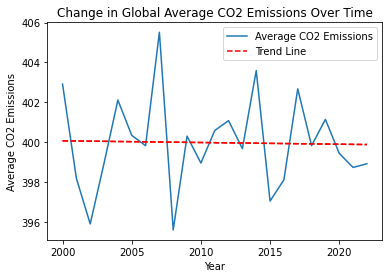

In [20]:
# Create an empty DataFrame to store the global average CO2 emissions over time
avg_co2_emissions_global = pd.DataFrame()

# Iterate over each country's grouped DataFrame
for country, df_group_list in grouped_dfs.items():
    # Concatenate all DataFrames within the list into a single DataFrame
    df_group = pd.concat(df_group_list)
    # Group by 'Year' and calculate the average CO2 emissions for each year
    avg_co2_emissions = df_group.groupby('Year')['CO2 Emissions'].mean()
    # Concatenate the average CO2 emissions to the global DataFrame
    avg_co2_emissions_global = pd.concat([avg_co2_emissions_global, avg_co2_emissions], axis=1)

# Calculate the mean of the global average CO2 emissions
avg_co2_emissions_global['Global'] = avg_co2_emissions_global.mean(axis=1)

# Sort the DataFrame by the 'Year' column
avg_co2_emissions_global.sort_index(inplace=True)

# Extract the years and global emissions as separate lists
years_global = avg_co2_emissions_global.index.tolist()
emissions_global = avg_co2_emissions_global['Global'].values.tolist()

# Perform linear regression to calculate the trend lines
slope, intercept = np.polyfit(years_global, emissions_global, 1)
trend_line = [slope * year + intercept for year in years_global]
plt.plot(years_global, trend_line, linestyle='--', color='red')

# Plot the global average CO2 emissions over time
plt.plot(years_global, emissions_global, label='Average CO2 Emissions')
plt.plot(years_global, trend_line, color='red', linestyle='--', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
plt.title('Change in Global Average CO2 Emissions Over Time')
plt.legend()
plt.show()

In [21]:
#Global Emissions are on a downward trend.

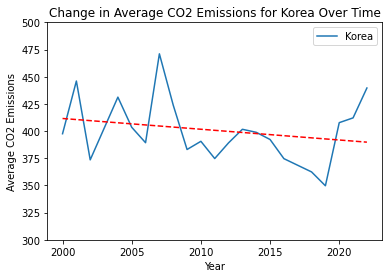

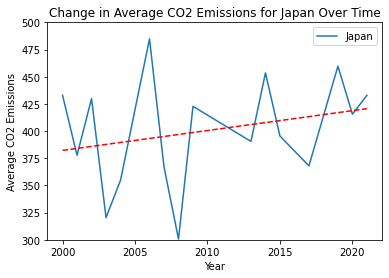

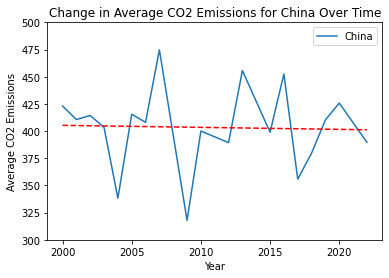

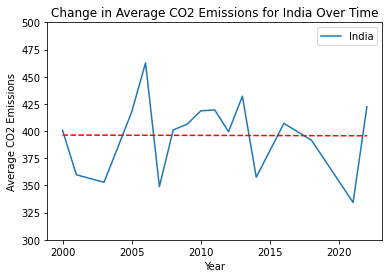

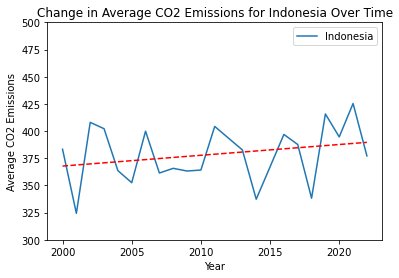

In [22]:
emissions_dict = {}
# Iterate over the countries
for country in country_of_interest:
    # Access the DataFrames for the specific country from grouped_dfs
    country_dfs = grouped_dfs.get(country, [])

    # Create an empty list to store the average CO2 emissions over time
    avg_co2_emissions_country = []

    # Iterate over the DataFrames and calculate the average CO2 emissions for each year
    for df in country_dfs:
        year = df['Year'].iloc[0]  # Get the year from the first row
        mean_co2_emissions = df['CO2 Emissions'].mean()
        avg_co2_emissions_country.append((year, mean_co2_emissions))

    # Separate the years and average CO2 emissions into separate lists
    years, emissions = zip(*avg_co2_emissions_country)
    emissions_dict[country]=emissions,years
    # Plot the change in average CO2 emissions over time for the current country
    plt.plot(years, emissions, label=country)

    # Perform linear regression to calculate the trend lines
    slope, intercept = np.polyfit(years, emissions, 1)
    trend_line = [slope * year + intercept for year in years]
    plt.plot(years, trend_line, linestyle='--', color='red')

    # Add labels and title to the plots
    plt.xlabel('Year')
    plt.ylabel('Average CO2 Emissions')
    plt.title(f'Change in Average CO2 Emissions for {country} Over Time')
    plt.legend()

    # Display the plot with a syncroized axis
    plt.ylim([300, 500])
    plt.show()

In [23]:
#Via trend-line analysis it can be said that Korea has the best future in emission reduction, but the latter data points are a bit concerning
#For Japan the trend is overall increasing, but their are a number of potential outliars present.
#China nearly perfectly matches the global trend
#India is almost perfectly level which is impressive considering their fast growing population
#Indonesia is consitantly growing, which could be seen as a worrying trend

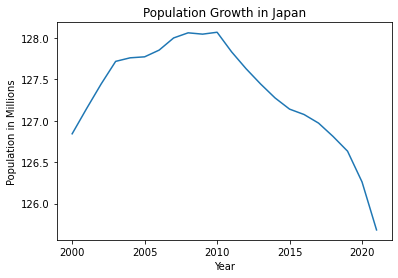

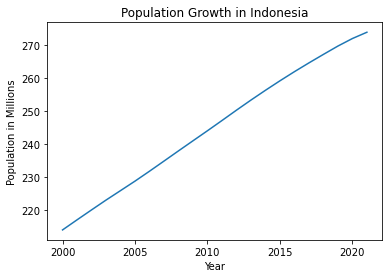

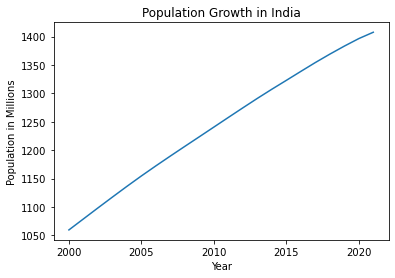

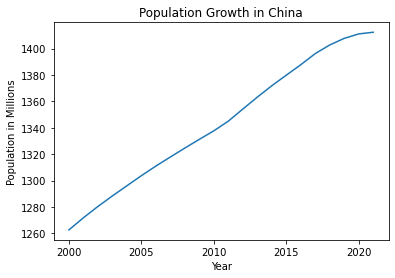

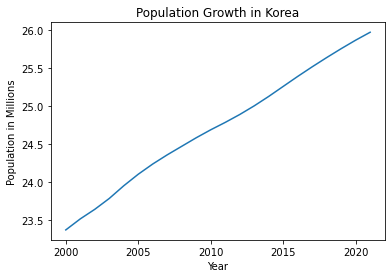

In [24]:
#Population plot over time
# Plot population growth for Japan
plt.plot(year_list_pop, japan_pop)
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.title('Population Growth in Japan')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, len(year_list_pop), 5))
plt.show()

# Plot population growth for Indonesia
plt.plot(year_list_pop, indonesia_pop)
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.title('Population Growth in Indonesia')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, len(year_list_pop), 5))
plt.show()

# Plot population growth for India
plt.plot(year_list_pop, india_pop)
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.title('Population Growth in India')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, len(year_list_pop), 5))
plt.show()

# Plot population growth for China
plt.plot(year_list_pop, china_pop)
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.title('Population Growth in China')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, len(year_list_pop), 5))
plt.show()

# Plot population growth for Korea
plt.plot(year_list_pop, korea_pop)
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.title('Population Growth in Korea')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, len(year_list_pop), 5))
plt.show()

In [25]:
#Comparing the above results with population records
#Above all it feels safe to conclude that population growth does not directly correlate to a larger carbon footprint
#But it does call into question Japan's emission trends even further